In [1]:
from scipy.sparse import coo_matrix
from scipy.sparse import save_npz, load_npz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle
import csv
import time
import codecs
from scipy import spatial
from collections import OrderedDict

<span> 1. </span> Import sparse symmetric matrix.

In [2]:
mx = load_npz('C:\\FOLDERS\\CEU\\Capstone Project\\Data\\media\\media\\media_pages_sparse_matrix.npz')

In [3]:
mx_array = mx.toarray()

<span>2.</span> Define dissimilarity measures.

In [4]:
mx_corr = np.zeros((86, 86))
mx_diss = np.zeros((86, 86))
mx_cos =  np.zeros((86, 86))

In [5]:
t1 = time.time()

for i in range(0,85):
    for j in range(i+1, 86):
        mx_diss[i,j] = 100 - 100 * int(mx_array[i,j]) * int(mx_array[i,j]) / (int(np.max(mx_array[i,:])) * int(np.max(mx_array[:,j])))

print(round(time.time()-t1) / 60, 1)


0.0 1


In [6]:
t1 = time.time()

for i in range(0,85):
    for j in range(i+1, 86):
        mx_cos[i,j] = 100 * spatial.distance.cosine(mx_array[i,:], mx_array[:,j])

print(round(time.time()-t1) / 60, 1)

0.0 1


In [7]:
t1 = time.time()

for i in range(0, 85):
    for j in range(i+1, 86):
        mx_corr[i,j] = 1 - np.corrcoef(mx_array[i, :], mx_array[: , j])[1,0]

print(round(time.time()-t1) / 60, 1)

0.0 1


<span>3.</span> Get labels

In [25]:
labeldict = {}

f = codecs.open('C:\\FOLDERS\\CEU\\Capstone Project\\Data\\media\\media\\media oldalnevek.txt', encoding='utf_8')

for line in f:
    key =(line.split("\t")[1])
    labeldict[key] = line.split("\t")[0]

f.close()


In [26]:
labeldict = OrderedDict(sorted(labeldict.items(), key=lambda t: t[0]))

In [84]:
titles = np.array(list(labeldict.values()))

In [85]:
titles[0:10]

array(['Magyar Narancs', 'Lánchíd Rádió', 'PC Guru', 'TV Paprika',
       'Világgazdaság Online', 'Múlt-kor történelmi portál',
       'Népszava Online', 'SportHirado.hu', 'Totalcar.hu',
       'Vasárnapi Hírek'], 
      dtype='<U51')

<span>4.</span> Get categories.

In [12]:
kat_files = ["1csaladotthon.txt", "2egeszsegsport.txt", "3elmenyszorakozas.txt", "4kommersz.txt",
            "5kozelet.txt", "6technika.txt", "7tudatossag.txt", "8uzletielet.txt"]
kategoriak = [1, 2, 3, 4, 5, 6, 7, 8]

In [13]:
d = {} # dictionary of categories for the indexed pages
for i in range(0,8):
    f = open(kat_files[i], 'r')
    l = f.readlines()
    f.close()
    for j in range(0, len(l)):
        h = len(l[j])
        page = int(l[j][2:h-1])
        d[page] = kategoriak[i]

Only 74 of the 86 media pages are categorized. 

In [14]:
page_categories = {} # a dict for pages with likes where keys are page_ids and values are categories (nagykategoriak)

count = 0
for key in labeldict.keys():
    k = int(key[0:15])
    if k in d.keys():
        count += 1
count

74

<span>5. Clustering on correlation

In [86]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_corr.shape[0]):
    for j in range(i + 1, mx_corr.shape[0]):
        l.append(mx_corr[i,j])

In [87]:
Z = linkage(l, method="ward")

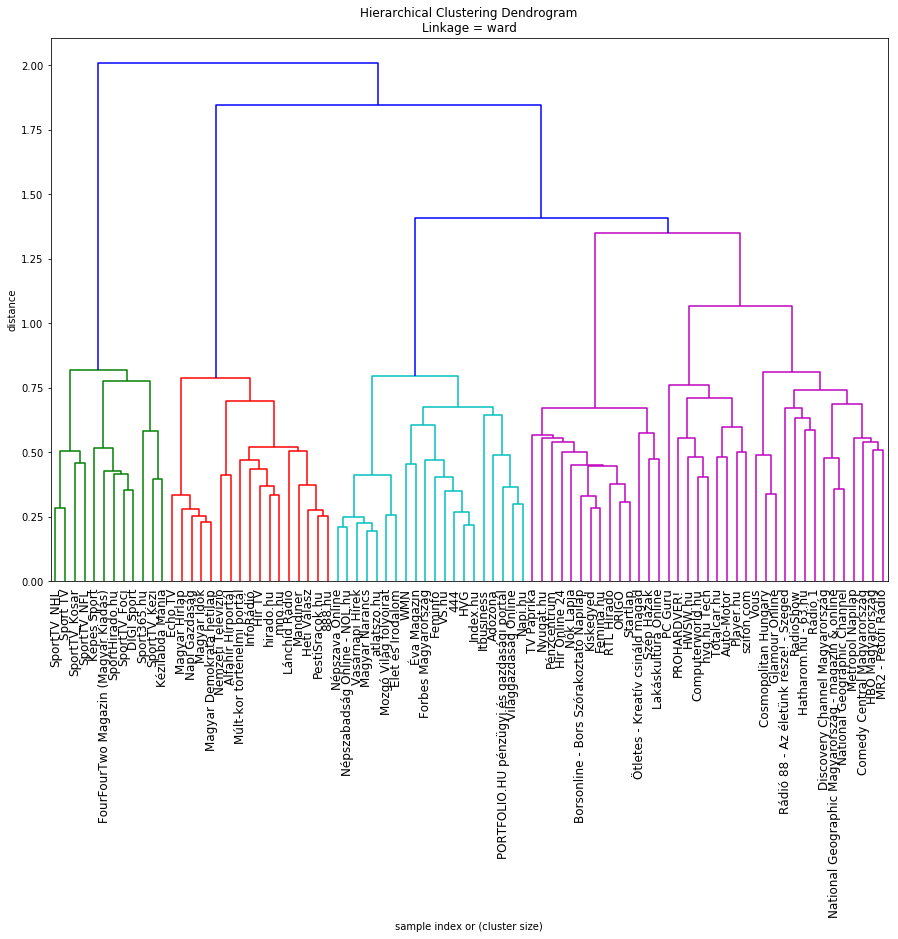

In [90]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = ward')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (20,10)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [33]:
Z = linkage(l, method="average")

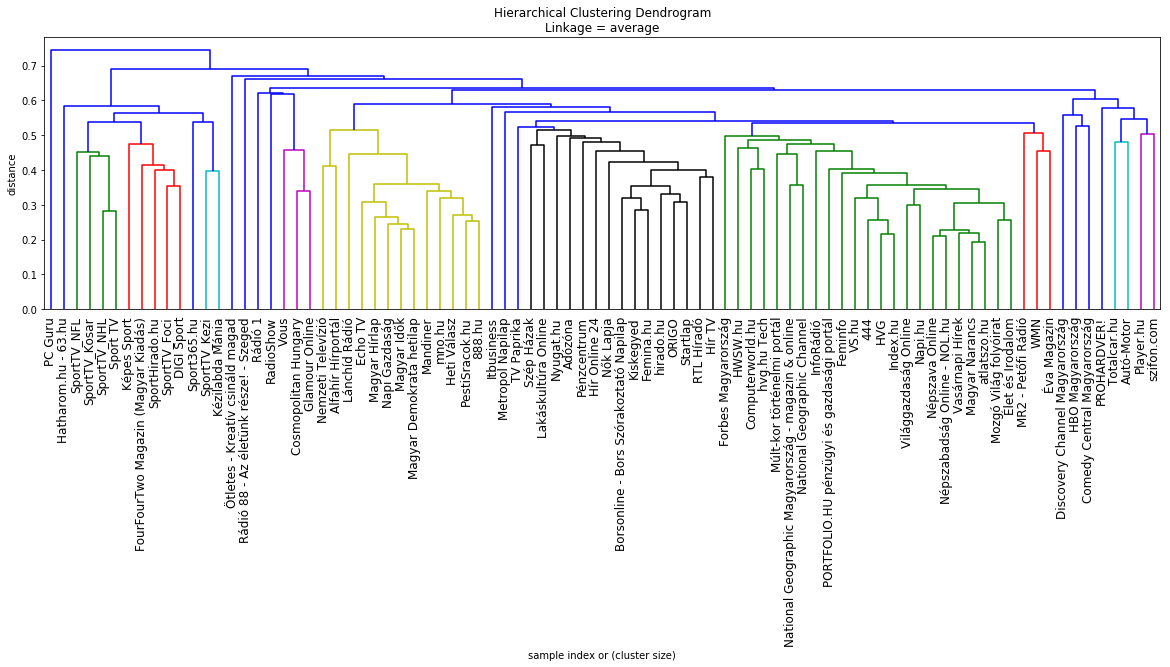

In [35]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = average')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (10,10)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

<span>6.</span> Clustering on cosine dissimilarity.

In [36]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_cos.shape[0]):
    for j in range(i + 1, mx_cos.shape[0]):
        l.append(mx_cos[i,j])

In [37]:
Z = linkage(l, method="ward")

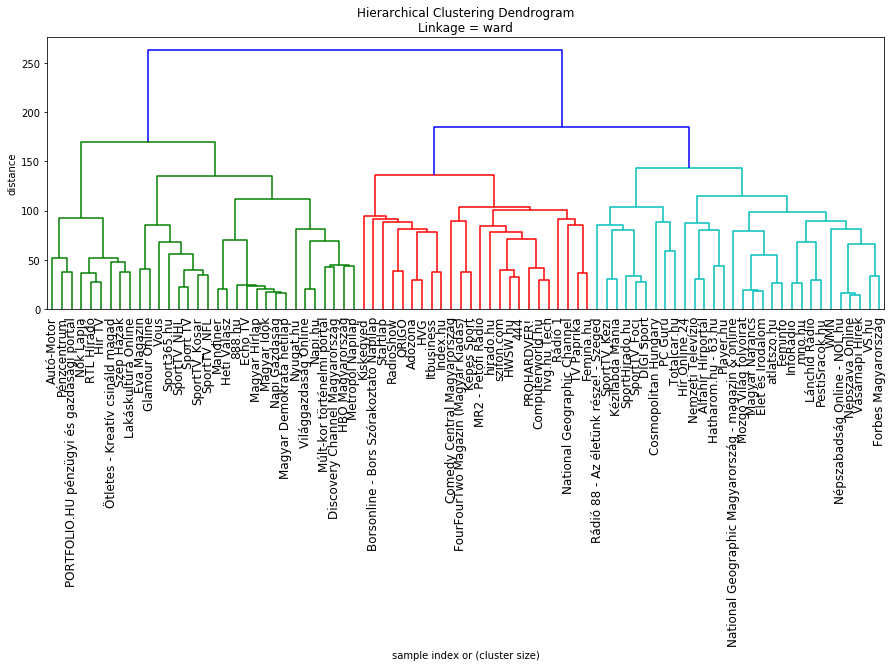

In [53]:

plt.title('Hierarchical Clustering Dendrogram\nLinkage = ward')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (20,5)

dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.show()

In [54]:
Z = linkage(l, method="average")

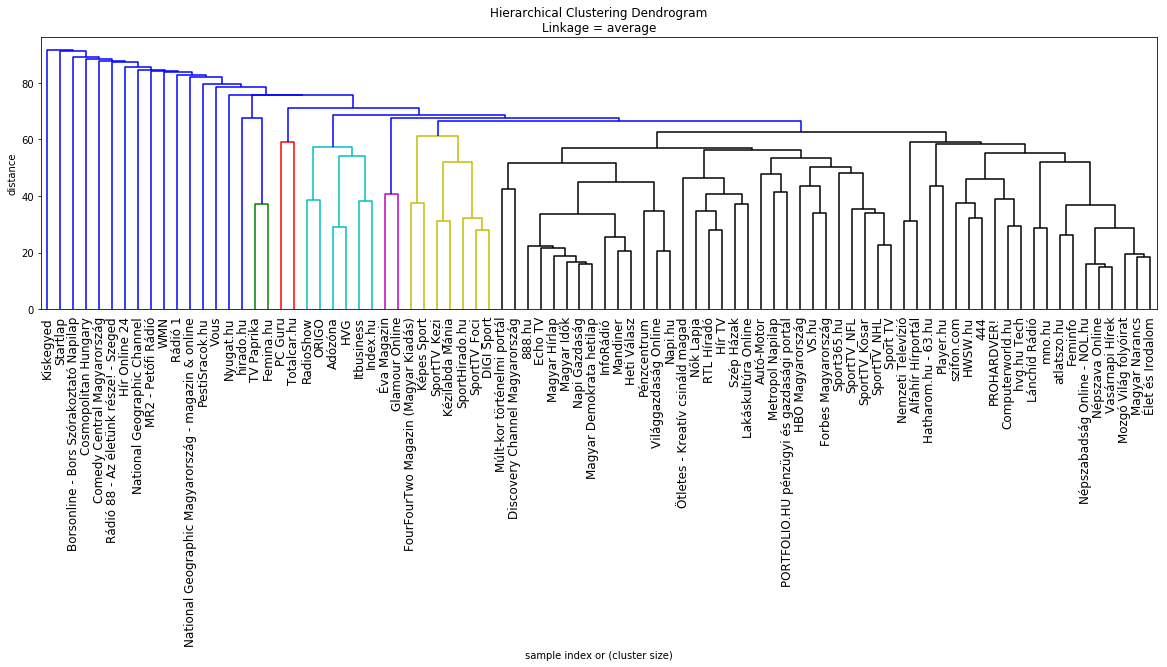

In [55]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = average')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (20,5)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

<span>7.</span> Clustering on squared differences.

In [56]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_diss.shape[0]):
    for j in range(i + 1, mx_diss.shape[0]):
        l.append(mx_diss[i,j])

In [57]:
Z = linkage(l, method="ward")

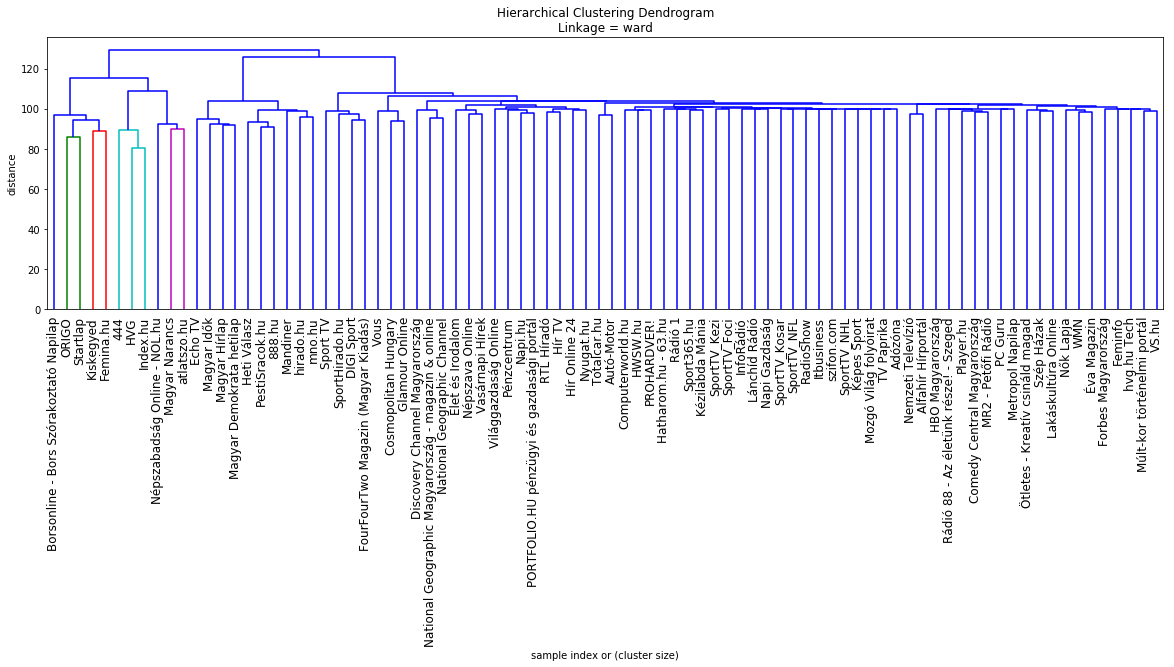

In [60]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = ward')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (20,5)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [61]:
Z = linkage(l, method="average")

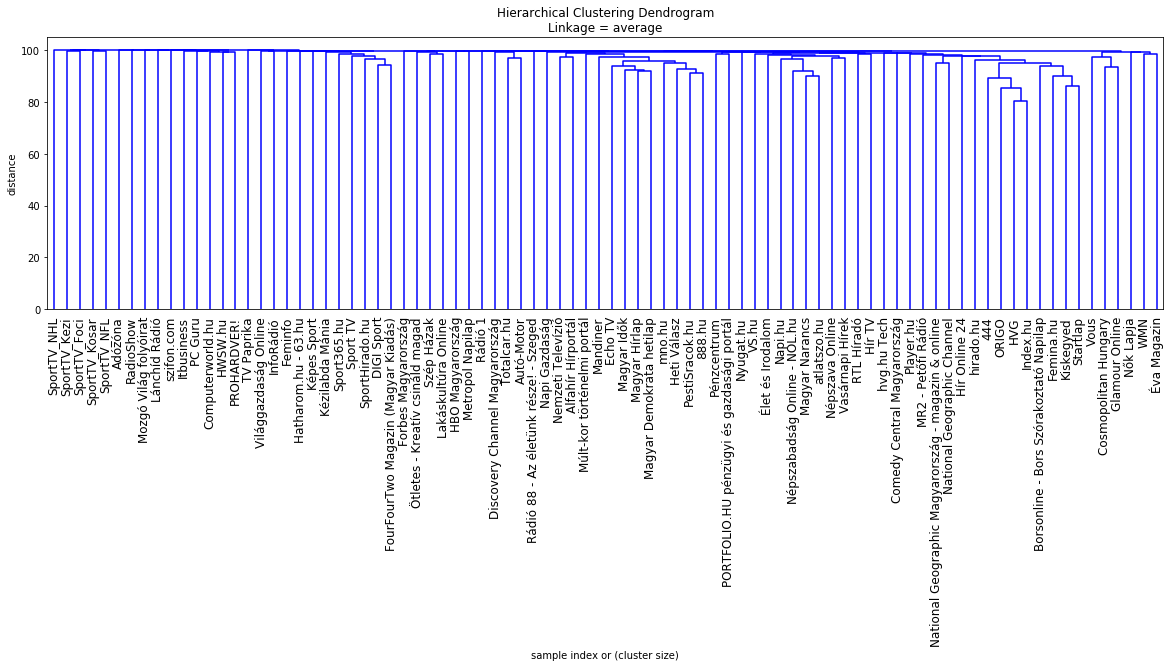

In [62]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = average')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (8,5)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

<span>8.</span> Creating clusters based on correlation; distance metric: ward.

In [91]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_corr.shape[0]):
    for j in range(i + 1, mx_corr.shape[0]):
        l.append(mx_corr[i,j])

In [92]:
Z = linkage(l, method='ward')

In [93]:
k=6
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')

In [96]:
clusters = pd.DataFrame({"pages": titles,
                       "cluster": scipy_hier_labels.tolist()})

In [110]:
clusters.head(10)

,cluster,pages
0,3,Magyar Narancs
1,2,Lánchíd Rádió
2,5,PC Guru
3,4,TV Paprika
4,3,Világgazdaság Online
5,2,Múlt-kor történelmi portál
6,3,Népszava Online
7,1,SportHirado.hu
8,5,Totalcar.hu
9,3,Vasárnapi Hírek


In [107]:
o = clusters.loc[0][1]

In [115]:
clusters_as_dictionary = {}


for element in list(set(scipy_hier_labels.tolist())):
    clusters_as_dictionary[element] = []

for i in range(len(clusters)):
    clusters_as_dictionary[clusters.loc[i][0]].append(clusters.loc[i][1])


In [116]:
clusters_as_dictionary

{1: ['SportHirado.hu',
  'SportTV_NHL',
  'SportTV_Kezi',
  'SportTV_Foci',
  'DIGI Sport',
  'SportTV_Kosar',
  'Sport365.hu',
  'SportTV_NFL',
  'FourFourTwo Magazin (Magyar Kiadás)',
  'Képes Sport',
  'Kézilabda Mánia',
  'Sport TV'],
 2: ['Lánchíd Rádió',
  'Múlt-kor történelmi portál',
  'InfoRádió',
  'Magyar Hírlap',
  'Magyar Idők',
  'Nemzeti Televízió',
  'Echo TV',
  'hirado.hu',
  'mno.hu',
  'Napi Gazdaság',
  'Mandiner',
  'PestiSracok.hu',
  'Heti Válasz',
  'Hír TV',
  'Magyar Demokrata hetilap',
  'Alfahír Hírportál',
  '888.hu'],
 3: ['Magyar Narancs',
  'Világgazdaság Online',
  'Népszava Online',
  'Vasárnapi Hírek',
  'Adózóna',
  'HVG',
  'WMN',
  'atlatszo.hu',
  'VS.hu',
  'Mozgó Világ folyóirat',
  'Népszabadság Online - NOL.hu',
  'Itbusiness',
  'Élet és Irodalom',
  'Feminfo',
  'Napi.hu',
  'Éva Magazin',
  'Forbes Magyarország',
  'PORTFOLIO.HU pénzügyi és gazdasági portál',
  '444',
  'Index.hu'],
 4: ['TV Paprika',
  'Kiskegyed',
  'RTL Híradó',
  'Femi